In [1]:
import sys, os
sys.path.append(os.path.abspath("../"))

import pandas as pd
from src.bdq.bdq_checks import run_bdq_checks, psi, correlation_change


In [2]:
cleaned = {
    "visitor_events": pd.read_csv("../data/cleaned/visitor_events.csv"),
    "applications": pd.read_csv("../data/cleaned/applications.csv"),
    "accounts": pd.read_csv("../data/cleaned/accounts.csv"),
    "transactions": pd.read_csv("../data/cleaned/transactions.csv"),
    "marketing_source": pd.read_csv("../data/cleaned/marketing_source.csv")
}


In [3]:
issues, summary_df = run_bdq_checks(cleaned)
summary_df


,check,num_issues
0,apps_missing_visitor,0
1,accs_missing_application,0
2,tx_missing_account,1000
3,bad_credit_score,0
4,negative_income,100
5,invalid_status,198
6,negative_deposit,0
7,bad_kyc_status,0
8,invalid_tx_amount,0
9,marketing_invalid_cost,0


In [4]:
# Show first 10 rows for each BDQ issue
for name, df in issues.items():
    print(f"BDQ Issue: {name}  (Total: {len(df)})")
    if len(df) == 0:
        print("No issues found.\n")
    else:
        display(df.head(10))


BDQ Issue: apps_missing_visitor  (Total: 0)
No issues found.

BDQ Issue: accs_missing_application  (Total: 0)
No issues found.

BDQ Issue: tx_missing_account  (Total: 1000)


,transaction_id,account_id,transaction_timestamp,amount,transaction_type,merchant_category,channel
347,561a1b3e-6a48-446e-96c5-8ef7b6694d1c,49adeb63-1650-4b10-a981-a6c7739657ca,2024-01-01 05:53:00,3779.16,debit,electronics,ATM
484,f08ee65a-2e7f-46d5-9a72-f8995725bdf4,b0563984-9088-4019-8e03-11d41dc5e7ee,2024-01-01 08:11:00,2672.45,debit,grocery,online
657,d332e83e-ec22-49ba-9a16-2c9050a516f2,9c50dcce-97ed-4943-a47a-8619e5de780d,2024-01-01 11:05:00,2565.80,credit,restaurant,ATM
815,b7e2505b-5fb3-4cf5-a8bf-7c640f8782fd,8ebd4f32-467c-4f26-ad12-e585fecf5aa0,2024-01-01 13:45:00,1222.06,credit,electronics,POS
1001,47717607-e94c-4a67-89d3-a785ace35f64,51a98b4d-f796-4f43-8af5-43f0e7a35347,2024-01-01 16:55:00,4927.35,debit,travel,ATM
1201,1fde7250-3d8f-496f-90b4-6116b2b2ef73,63e045b0-f9d5-4e22-90b2-24bee2d25d04,2024-01-01 20:17:00,1884.56,debit,electronics,ATM
1543,b026e70c-2325-4b47-90bd-91734b4498fd,dd964ce2-996a-4713-bf2f-fa746a5be2e1,2024-01-02 02:01:00,3098.00,debit,electronics,POS
1592,5687ce4f-7672-4ad7-b3ed-d49056ab268e,dd964ce2-996a-4713-bf2f-fa746a5be2e1,2024-01-02 02:51:00,1496.22,debit,restaurant,ATM
1609,51e26197-565f-4b19-89c1-6873389d9b7e,ea6a185d-2335-4843-9f6c-84814724ad7c,2024-01-02 03:09:00,907.71,credit,grocery,POS
1785,5986ea5e-d00e-4c8b-b2ba-7417c17adfe7,9c50dcce-97ed-4943-a47a-8619e5de780d,2024-01-02 06:06:00,1403.00,debit,grocery,ATM


BDQ Issue: bad_credit_score  (Total: 0)
No issues found.

BDQ Issue: negative_income  (Total: 100)


,application_id,visitor_id,application_date,status,credit_score,income,loan_amount,product_type,source_channel
42,cece2d93-fbbb-43f8-bb2b-129dee1eb064,26387,2024-03-04,submitted,530.0,-5000,121972,personal_loan,referral
77,51680569-89fa-45a0-8481-0b2db0e91795,10339,2024-03-21,submitted,340.0,-5000,15977,credit_card,referral
83,a704e08a-0c16-401e-b95b-9f1a2603d3f7,12938,2024-02-09,submitted,412.0,-5000,85497,mortgage,email
85,bb18b5b5-b24d-4e4d-8f18-16c1a2ab41b2,26192,2024-01-10,submitted,748.0,-5000,21775,mortgage,ads
242,5499de39-dfd7-4d20-ad6f-e9e5fea8cbc3,25882,2024-02-18,approved,758.0,-5000,97159,personal_loan,direct
315,69893f7c-6d09-4151-a727-89092516afd9,21048,2024-02-24,submitted,604.0,-5000,88576,personal_loan,direct
660,317a4b1b-be49-49c8-9814-cd7ffe38fbeb,15041,2024-03-16,submitted,563.0,-5000,13343,credit_card,direct
953,74aa2284-1749-4465-9aa3-e84fd52068c7,15422,2024-02-19,submitted,629.0,-5000,94376,mortgage,email
1126,4e96a970-17da-4c51-aff9-42220e58067b,28931,2024-03-01,submitted,685.0,-5000,35789,mortgage,direct
1167,e7747ce7-16e1-4c61-a236-690f945dd768,25519,2024-03-18,rejected,824.0,-5000,67273,personal_loan,email


BDQ Issue: invalid_status  (Total: 198)


,application_id,visitor_id,application_date,status,credit_score,income,loan_amount,product_type,source_channel
11,92bf2878-9141-4f22-b9ab-407ac8653f15,21576,2024-02-14,unknwon,739.0,94827,9032,mortgage,referral
33,5c94ce16-15df-40ca-8189-f09c1ea76086,28139,2024-01-26,unknwon,333.0,99472,23159,personal_loan,direct
55,42e66f9d-df50-4f63-a5bc-16875f7344af,19044,2024-02-11,unknwon,494.0,47862,99487,credit_card,email
70,810152ae-5703-42d0-92ce-f5c57ffb5afc,15413,2024-03-24,unknwon,755.0,129853,55884,personal_loan,email
144,4fdb20a0-bab1-49f1-b359-4407feaa24da,18431,2024-02-08,unknwon,410.0,38976,167613,mortgage,referral
197,b4cc9227-685f-4db3-b776-697cc28faf67,22519,2024-03-02,unknwon,541.0,20757,115558,credit_card,ads
494,05ae938e-3434-4445-ab0a-be66bd73f93c,26391,2024-02-08,unknwon,504.0,117386,190684,mortgage,referral
616,f5687d9d-d253-4614-8da7-755bcda3bad8,15536,2024-02-13,unknwon,576.0,111264,162974,personal_loan,referral
744,07af6cad-6e28-4dd7-a82e-6d9f57c6ce27,17960,2024-01-20,unknwon,338.0,22530,101490,personal_loan,ads
849,693e492a-94b1-4ede-b312-f03cd3668b85,12159,2024-02-23,unknwon,355.0,44623,35365,credit_card,referral


BDQ Issue: negative_deposit  (Total: 0)
No issues found.

BDQ Issue: bad_kyc_status  (Total: 0)
No issues found.

BDQ Issue: invalid_tx_amount  (Total: 0)
No issues found.

BDQ Issue: marketing_invalid_cost  (Total: 0)
No issues found.



<Figure size 1000x400 with 0 Axes>

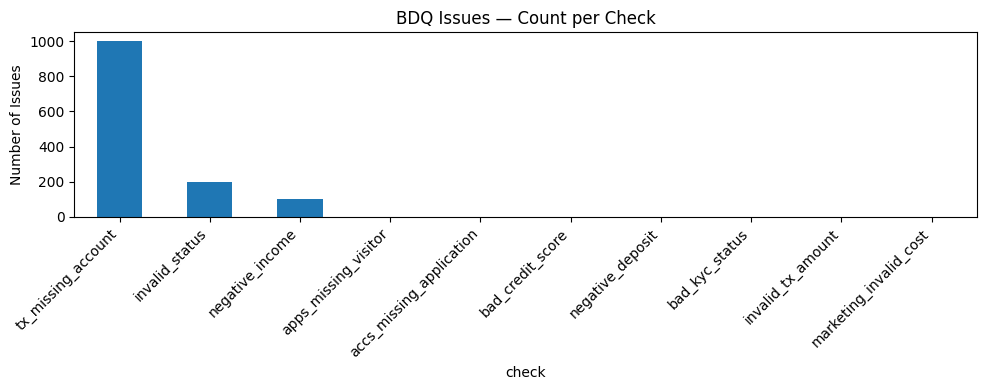

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
summary_df.sort_values("num_issues", ascending=False).plot(
    x="check",
    y="num_issues",
    kind="bar",
    legend=False,
    figsize=(10,4)
)
plt.title("BDQ Issues — Count per Check")
plt.ylabel("Number of Issues")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [7]:
# save summary + issue files
import os
os.makedirs("../data/reports/bdq/", exist_ok=True)

summary_df.to_csv("../data/reports/bdq/bdq_summary.csv", index=False)

for name, df in issues.items():
    df.to_csv(f"../data/reports/bdq/{name}.csv", index=False)

print("BDQ reports saved to /data/reports/bdq/")


BDQ reports saved to /data/reports/bdq/
